# K-means

## Algo
1. Define ```k``` and ```max_iter``` (maximum number of_iterations)
2. Compute *k* random centroids
3. Until max number of iterations not reached:
    - Assign to each training sample its nearest centroid
    - Udpate centroid coordinates

In [42]:
import numpy as np
from numpy.linalg import norm
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm

class MyKmeans:
    '''
    desc: Implementation of Kmeans algorithm
    1.Define k and max_iter (maximum number of_iterations)
    2.Compute k random centroids
    3.Until max number of iterations not reached:
        - Assign to each training sample its nearest centroid
        - Udpate centroid coordinates
    '''
    def __init__(self, k, max_iter=100, verbose=False, random_state=42):
        self.k = k #TODO
        self.verbose = verbose
        self.rs = random_state #TODO
        self.centroids = None
        self.max_iter = max_iter #TODO
        self.labels = np.array(range(self.k))
        self.classes = None
        self.inertia = None
        if verbose:
            print('*****  Initialization of Kmeans with {} clusters  *****'.format(self.k))
            print('\tmax_iter: \t', self.max_iter)
            print('\tlabels: \t', self.labels)
            print('\trandom state: \t', self.rs)
            print('\tverbose: \t', self.verbose)                                 
            print('******************************************************')
    
    def fit(self, X):
        '''
        desc: This function trains kmeans on X with k clusters
            --> At the end, a label will be assigned to each sample of X and be stored in classes attribute
        '''
        # init centroids
        ranges = [] # cf. init_centroids function for more information
        # TODO
        for i in range(2):
            min_feature = min(X[:, i])  #The minimum feature dimensions of a sample 
            max_feature = max(X[:, i])  #The maximum dimension of a feature sample
            ranges.append(min_feature)
            ranges.append(max_feature)
        self.centroids = self.init_centroids(ranges)
        
        
       
        # until stopping criteria is reached ... : TODO
        for i in range(self.max_iter):
            # assign label to each sample : TODO
            # (hint : use knn)
            old_centroids = self.centroids
            
            distance = np.zeros((X.shape[0], self.k))
            for k in range(self.k):
                row_norm = norm(X - old_centroids[k, :], axis=1) #axis=1
                distance[:, k] = np.square(row_norm)
            
            self.labels = np.argmin(distance, axis=1)
            
            current_clusters = self.labels # here are stored the current nearest cluster of each sample in X
           
            # update centroids coordinates 
            new_centers = [] # here will be stored the new centroids of previous clusters
            # TODO
            new_centers = np.zeros((self.k, X.shape[1]))
        
            for k in range(self.k):
                new_centers[k, :] = np.mean(X[self.labels == k, :], axis=0)
                
            new_centers = np.array(new_centers)
            
            # looking for convergence
            # facultative (end the loop before reaching max number of iterations if convergence)
            
            self.centroids = new_centers # updating old centroids with new ones 
            
        self.classes = current_clusters # here are stored the nearest cluster of each sample in X
        self.verbose = True
        # computing inertia
        self.ssd(X)
        
        if self.verbose:
            print('Model trained in {} iterations...'.format(i+1))  
        
    def init_centroids(self, ranges):
        '''
        desc: Compute self.k random centroids defined within specified ranges
        each row in ranges correspond to a feature
        two columns in range (col1 : min value, col2 : max value)
        '''
        # Setting seed
        np.random.seed(self.rs)
        
        # Computing k centroids
        self.centroids = []
        # TODO (hint: use np.random.uniform)
        values = []
    
        for m in range(self.k):
            for l in range(1):
                values.append(np.random.uniform(ranges[l], ranges[l+1]))
                values.append(np.random.uniform(ranges[l+2], ranges[l+3]))
        values = np.array(values)
        #print(values)
        values = values.reshape(self.k,2)
        self.centroids = values
        return self.centroids
    
    def ssd(self,X):
        '''
        Compute sum of squared distances (inertia)
        Used for elbow method
        '''
        res = 0
        # TODO
        distance = np.zeros(X.shape[0])
        for k in range(self.k):
            distance[self.labels==k] = norm(X[self.labels == k] - self.centroids[k], axis=1)
        return np.sum(np.square(distance))
        
        
        self.inertia = res
        
    def predict(self,X):
        '''
        Assign the nearest cluster to each sample of X
        Kmeans has to be trained before using this function
        '''
        
        predictions = []
        old_centroids = self.centroids
        distance = np.zeros((X.shape[0], self.k))
        for k in range(self.k):
            row_norm = norm(X - old_centroids[k, :], axis=1) #axis=1
            distance[:, k] = np.square(row_norm)
            
        labels = np.argmin(distance, axis=1)
            
        predictions = labels # here are stored the current nearest cluster of each sample in X
       # for i in X:
        #    classification = clf.predict(unknown)
          #  plt.scatter(unknown[0], unknown[1], marker="*", color=colors[classification], s=150, linewidths=5)

        #plt.show()
       
        # TODO
        return predictions
    


## 1. Visualisation des données

#### a) Charger la base de données (Customers_practice.csv)

In [43]:
import pandas as pd
df=pd.read_csv('Customers_practice.csv')

#### b)  Afficher les 10 premières lignes du jeu de données (fonction head()). Déterminer le nombre d’exemples, ainsi que le nombre de features pour ce problème.

In [44]:
df.head(10)

,Annual_Income_(k$),Spending_Score
0,103,85
1,60,52
2,59,55
3,62,55
4,48,47
5,44,50
6,73,5
7,33,92
8,71,75
9,21,66


In [45]:
df.shape

(170, 2)

Réponse : Il y a 170 exemples et 2 features(Annual_Income_(k$) et Spending_Score)

#### Afficher les données à l’aide d’un scatterplot (utiliser la librairie seaborn ou matplotlib).

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


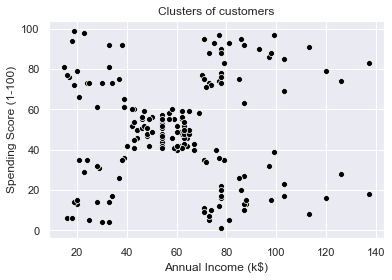

In [47]:
sns.scatterplot(x="Annual_Income_(k$)", y="Spending_Score", data=df,color="0")
plt.title('Clusters of customers')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

## 2. K-means algorithm

In [48]:
km = MyKmeans(3)

In [49]:
km.fit(df.values)

Model trained in 100 iterations...


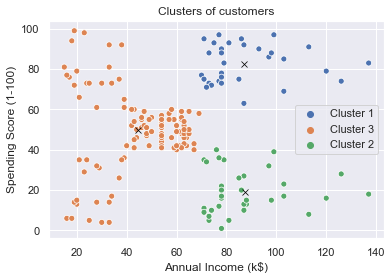

In [50]:
convertLabel = []
for cT in km.labels:
    if cT == 0:
        convertLabel.append("Cluster 1")
    elif cT == 1:
        convertLabel.append("Cluster 2")
    else:
        convertLabel.append("Cluster 3")
        
sns.scatterplot(x="Annual_Income_(k$)", y="Spending_Score", data=df, hue= convertLabel)
sns.scatterplot(km.centroids[:,0] ,km.centroids[:,1], color='black', marker='x')
plt.title('Clusters of customers')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

k=3 ne semble pas être la valeur appropriée comme nombre correct de clusters parce-que visuellement, on remarque que la variance intra de chaque classe est élevée notamment pour la classe rouge.

## 3. Trouver la valeur optimale de k

Model trained in 100 iterations...
Model trained in 100 iterations...
Model trained in 100 iterations...
Model trained in 100 iterations...
Model trained in 100 iterations...
Model trained in 100 iterations...
Model trained in 100 iterations...
Model trained in 100 iterations...
Model trained in 100 iterations...
Model trained in 100 iterations...
Model trained in 100 iterations...
Model trained in 100 iterations...
Model trained in 100 iterations...
Model trained in 100 iterations...
Model trained in 100 iterations...
Model trained in 100 iterations...
Model trained in 100 iterations...
Model trained in 100 iterations...


C:\Users\Joseph\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Joseph\anaconda3\lib\site-packages\numpy\core\_methods.py:153: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


Model trained in 100 iterations...
Model trained in 100 iterations...


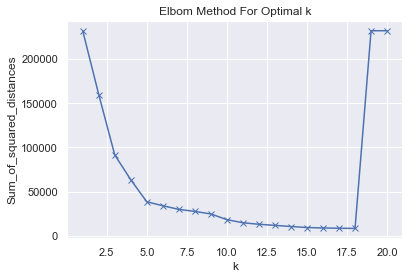

In [51]:
ssds=[]
a = range(1,21)
for i in range(1, 21):
    kmElbow = MyKmeans(i)
    kmElbow.fit(df.values)
    ssds.append(kmElbow.ssd(df.values))

sds=np.array(ssds) 
plt.plot(a, ssds, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbom Method For Optimal k')
plt.show()

On remarque que la meilleure valuer pour k semble être k = 5.

Model trained in 100 iterations...


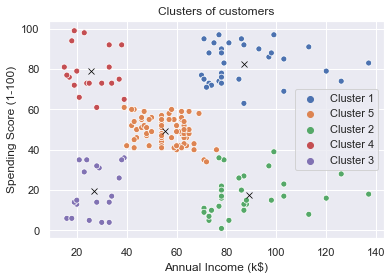

In [52]:
kmTrue = MyKmeans(5)
kmTrue.fit(df.values)

convertLabel = []
for cT in kmTrue.labels:
    if cT == 0:
        convertLabel.append("Cluster 1")
    elif cT == 1:
        convertLabel.append("Cluster 2")
    elif cT == 2:
        convertLabel.append("Cluster 3")
    elif cT == 3:
        convertLabel.append("Cluster 4")
    else:
        convertLabel.append("Cluster 5")

sns.scatterplot(x="Annual_Income_(k$)", y="Spending_Score", data=df, hue= convertLabel)
sns.scatterplot(kmTrue.centroids[:,0] ,kmTrue.centroids[:,1], color='black', marker='x')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title('Clusters of customers')
plt.show()

Cluster 1 (bleu): clients ayant des revenus faibles et réalisant peu de dépenses 
Cluster 2 (vert): clients ayant des revenus élevés et réalisant peu de dépenses (il y a en a plus que le cluster 1)
Cluster 3 (violet): clients ayant des revenus moyens et réalisant un nombre moyen de dépenses) 
Cluster 4 (rouge): clients ayant des revenus faibles mais réalisant un grand nombre de dépenses) 
Cluster 5 (orange): clients ayant des revenus élevés et réalisant un grand nombre de dépenses)

## 4. Pas de partie 4

## 5 Aller plus loin

In [53]:
dftest = pd.read_csv('Customers_practice_test.csv') # Loading Customers_practice_test.csv

In [54]:
dftest.head()

,Annual_Income_(k$),Spending_Score
0,62,42
1,19,3
2,48,50
3,87,75
4,88,69


In [55]:
dftest.shape

(30, 2)

In [76]:
kmPartie5 = MyKmeans(5)
kmPartie5.fit(df.values)

Model trained in 100 iterations...


In [77]:
def save(predictions):
    '''
    predictions of kmeans
    '''
    column = ['prediction']
    res_df = pd.DataFrame(predictions, columns=column)
    print(res_df)
    res_df.to_csv('resultats.csv', index=None)

In [78]:
preds = kmPartie5.predict(dftest.values)

In [79]:
save(preds) # execute the cell to generate resultats.csv

    prediction
0            4
1            2
2            4
3            0
4            0
5            4
6            3
7            3
8            0
9            0
10           4
11           4
12           3
13           4
14           4
15           0
16           1
17           2
18           4
19           1
20           2
21           4
22           0
23           1
24           1
25           4
26           4
27           2
28           1
29           4


In [80]:
h = .15
d1 = dftest.iloc[:,0] #sepal length
d2 = dftest.iloc[:,1] #sepal width
x_min, x_max = d1.min() - 1, d1.max() + 1
y_min, y_max = d2.min() - 1, d2.max() + 1

x = np.arange(x_min, x_max, h)
y = np.arange(y_min, y_max, h)

In [81]:
xx, yy = np.meshgrid(x,y)

(0.0, 91.95)

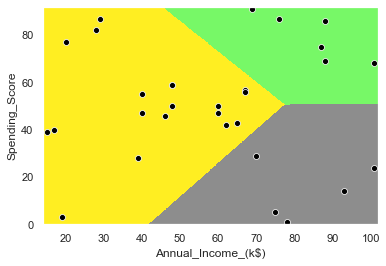

In [82]:
cmap_light = ListedColormap(['#77F867', '#8D8D8D','#FFEE22'])
plt.figure()
Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
plt.pcolormesh(xx, yy, Z.reshape(xx.shape), cmap=cmap_light)
sns.scatterplot(d1, d2, color="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())